# Introduction

Here I want to compute the n-cover times. For my taxi-trip process, as well as the random walk. For N = 1, i expect the random walk to win. I'm hoping that for n > 2, the taxi-trip will do better.

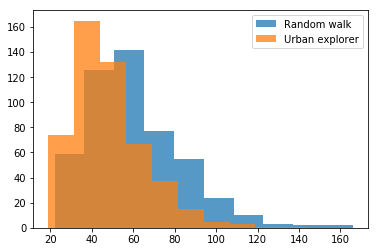

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import funcs as f
import osmnx as ox
import networkx as nx
from multiprocessing import Pool
from datetime import datetime
import time as time
from scipy import optimize
import pickle
%matplotlib inline

G = nx.grid_graph(dim=[2,2,2,2])
G = nx.convert_node_labels_to_integers(G)

num_trials, n = 500, 1
Ts_rw = f.random_walk_covertime(G,n,num_trials=num_trials)
Ts_rd = f.urban_explorer_covertime(G,n,num_trials=num_trials)
plt.hist(Ts_rw, alpha=0.75);plt.hist(Ts_rd,alpha=0.75);plt.legend(['Random walk','Urban explorer'])

Very similar here

## Scaling with N

/home/kokeeffe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


finished N = 1
finished N = 2
finished N = 3
finished N = 4


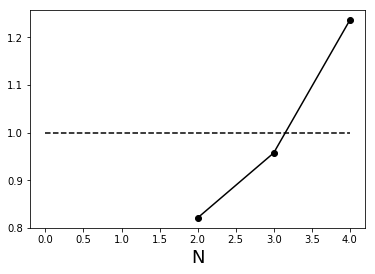

In [3]:
meanTratios = []
Ns = range(1,5)
m = 1
for N in Ns:
    num_trials = 500
    G = nx.grid_graph(dim=[N,N,N,N])
    G = nx.convert_node_labels_to_integers(G)
    Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    meanTratios.append(np.mean(Ts_ue)/np.mean(Ts_rw))
    print 'finished N = ' + str(N)
plt.plot(Ns,meanTratios,'ko-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')
plt.hlines(1,0,max(Ns),linestyles='dashed')

Interesting: the random walk wins for larger graph sizes. 

### Startionary densities

(array([ 4.,  0., 12.,  0.,  0.,  0.,  4.,  0.,  4.,  1.]),
 array([0.00384014, 0.01284796, 0.02185578, 0.03086361, 0.03987143,
        0.04887925, 0.05788707, 0.0668949 , 0.07590272, 0.08491054,
        0.09391837]),
 <a list of 10 Patch objects>)

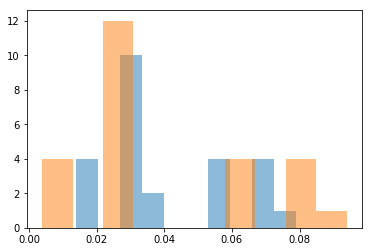

In [56]:
def compute_and_save_all_shortest_paths(G):
    
    """
    Input: nx.graph, G
    Output: list, paths, where paths[start][end] = [ path1, path2 ]
                where path1 = [node1,nod2] is one of (possibly more than one) shortest paths from 
                start to end
    """
    
    nodes = [node for node in G.nodes()]
    n = len(nodes)
    
    paths = list(np.zeros((n,n)))
    paths = [list(i) for i in paths]

    for start in nodes:
        for end in nodes:
            path = nx.all_shortest_paths(G,start,end)
            path = [p for p in path]
            paths[start][end] = path
    return paths


#Make graph
num_nodes_per_side = 5
G = nx.grid_2d_graph(num_nodes_per_side,num_nodes_per_side)
G = nx.convert_node_labels_to_integers(G)

#Run U.E.
N = G.number_of_nodes()
counts = np.zeros(N)
T = 10**5
counts = f.urban_explorer_stationary_densities(G,counts,T)
counts = counts / sum(counts)

#Find betweenness
bs = nx.betweenness_centrality(G).values()
bs = np.array(bs) / sum(bs)

plt.hist(counts,alpha=0.5)
plt.hist(bs,alpha=0.5)

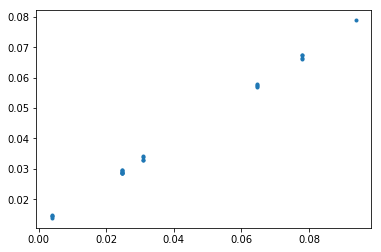

In [57]:
plt.plot(bs,counts,'.')

Ok, so the stationary densities are the betweeness.